In [3]:
data <- read.csv('house_price.csv')

In [4]:
dim(data)

[1] 2919   13

In [5]:
getMissingValues <- function(data) {
    missing_values <- colSums(is.na(data))

    sorted_missing_values <- sort(missing_values, decreasing = TRUE)

    for (col_name in names(sorted_missing_values)) {
        cat("Column:", col_name, "\tMissing Values:", sorted_missing_values[col_name], "\n")
    }
}

In [6]:
data <- na.omit(data)
sum(is.na(data))

[1] 0

In [7]:
data <- subset(data, select = -Id)

In [8]:
install.packages(c("ggplot2"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages(c("corrplot", "ggcorrplot", "PerformanceAnalytics"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(corrplot)
library(ggcorrplot)
library(PerformanceAnalytics)

corrplot 0.95 loaded

Loading required package: ggplot2

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




In [20]:
ggcorrplot(cor(data), hc.order = TRUE, lab = TRUE)

ERROR: Error in cor(data): 'x' must be numeric


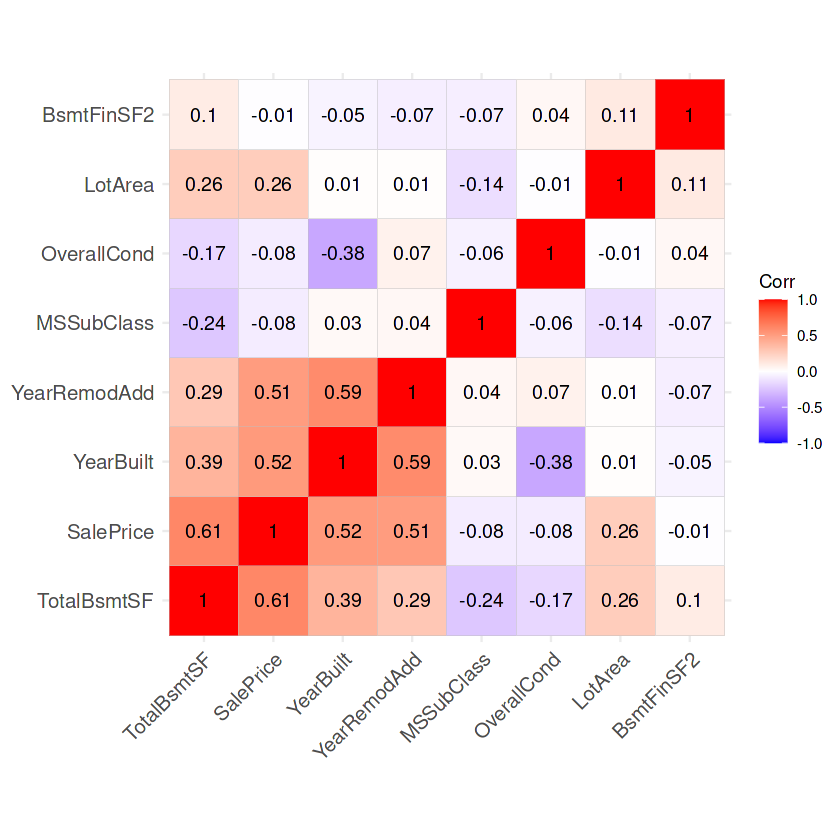

In [23]:
numeric_data <- data[, sapply(data, is.numeric)]

ggcorrplot(cor(numeric_data), hc.order = TRUE, lab = TRUE)

List of 136
 $ line                            :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                            :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                            :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: l

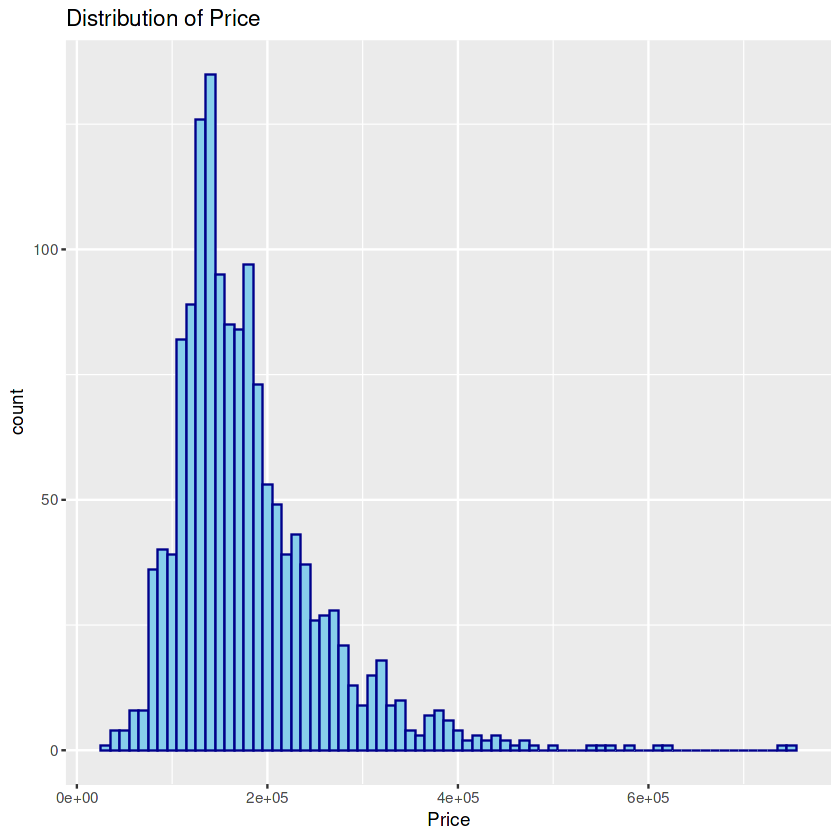

In [16]:
library(ggplot2)

ggplot(data, aes(x = SalePrice)) + 
geom_histogram(binwidth= 10000, fill = "skyblue", color = "darkblue") + 
labs(title = "Distribution of Price", x = "Price")
theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


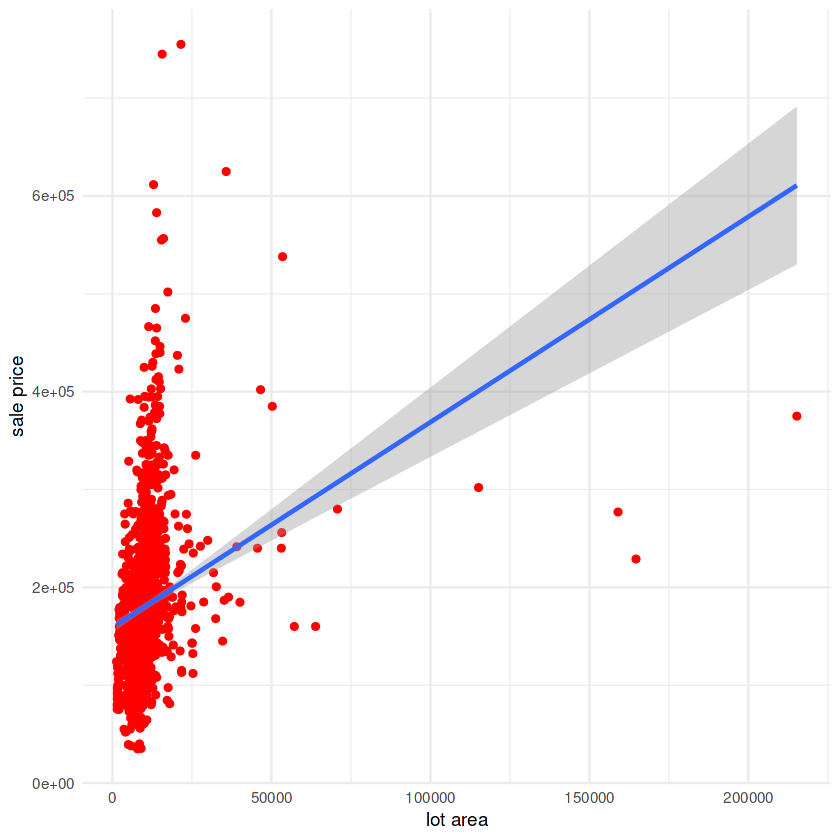

In [18]:
ggplot(data, aes(x=LotArea, y = SalePrice)) + 
geom_point(color = "red") + 
labs(titile = "Scatter plot: lot area vs sale price", x = "lot area", y = "sale price") +
theme_minimal() + 
geom_smooth(method = lm)

`geom_smooth()` using formula = 'y ~ x'


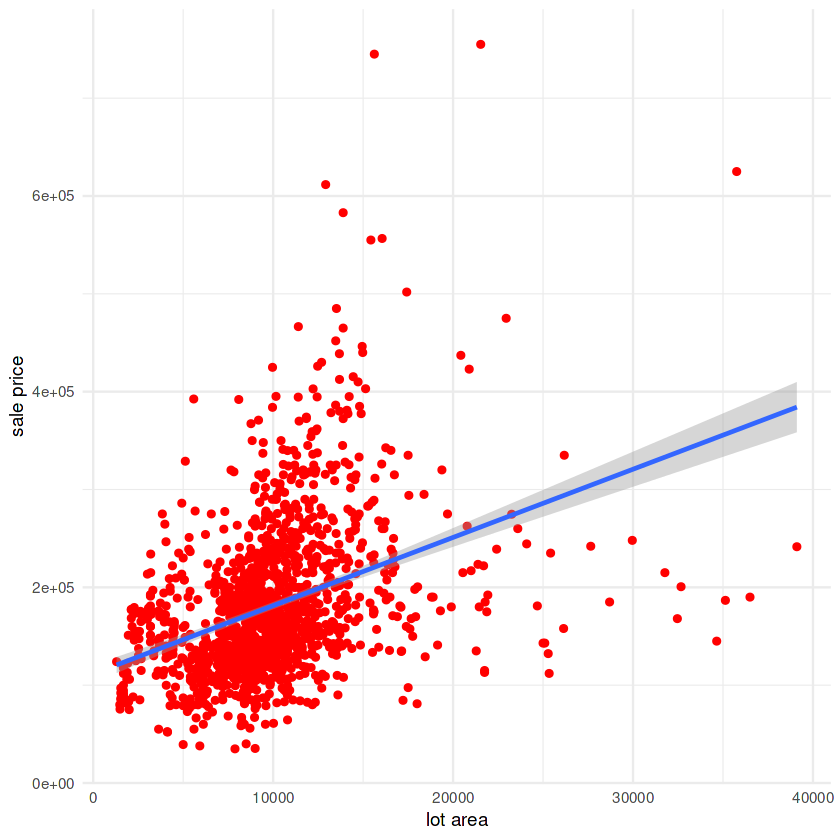

In [26]:
data <- data[data$LotArea < 40000, ]

ggplot(data, aes(x=LotArea, y = SalePrice)) + 
geom_point(color = "red") + 
labs(titile = "Scatter plot: lot area vs sale price", x = "lot area", y = "sale price") +
theme_minimal() + 
geom_smooth(method = lm)

In [27]:
set.seed(123)

train_proportion <- 0.7

train_indices <- sample(1:nrow(data),
                       size = round(train_proportion * nrow(data)))

train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

dim(train_data)
dim(test_data)

[1] 1012   12

[1] 434  12

In [28]:
model <- lm(SalePrice ~ ., data = train_data)
summary(model)


Call:
lm(formula = SalePrice ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-142302  -24605   -2250   18572  259938 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.928e+06  1.883e+05 -15.552  < 2e-16 ***
MSSubClass          9.883e+02  6.982e+01  14.155  < 2e-16 ***
MSZoningFV          3.862e+04  1.620e+04   2.383 0.017361 *  
MSZoningRH          3.556e+04  1.969e+04   1.806 0.071162 .  
MSZoningRL          2.845e+04  1.474e+04   1.931 0.053830 .  
MSZoningRM          2.471e+04  1.488e+04   1.661 0.097122 .  
LotArea             3.993e+00  3.929e-01  10.163  < 2e-16 ***
LotConfigCulDSac    2.413e+03  6.309e+03   0.383 0.702165    
LotConfigFR2       -3.151e+03  7.856e+03  -0.401 0.688383    
LotConfigFR3       -8.848e+02  2.483e+04  -0.036 0.971582    
LotConfigInside     2.415e+03  3.659e+03   0.660 0.509443    
BldgType2fmCon     -1.405e+05  1.477e+04  -9.511  < 2e-16 ***
BldgTypeDuplex     -7.237e+04  

In [30]:
predictions <- predict(model, newdata = test_data)

head(predictions)

1        3        7       14       15       21 
208715.5 223826.4 257820.2 244491.7 157497.6 262002.2

In [31]:
test_case <- data.frame(MSSubClass = 60, MSZoning = 4, LotArea = 8450,
                       LotConfig = 5, BldgType = 1, OverallCond = 5,
                       YearBuilt = 2003, YearRemodAdd = 2003, Exterior1st = 13,
                       BsmtFinSF2 = 0, TotalBsmtSF = 856)

predicted_price <- predict(model, new_data = test_case)
print(predicted_price)

       420        470        180        534        196        950       1154 
143250.118 182669.045 135430.249 -18588.760 115644.149 178982.036 125352.896 
      1336       1265       1280       1050       1412        674        610 
171550.624 207684.721  50231.333  70990.755 180173.206 252846.825 122785.290 
       719       1023       1127        965        352       1029       1392 
251179.281 115837.146 203295.981 213202.184 292270.864 121113.927 173556.777 
       852         26        527        212        944        601        563 
185896.076 264088.129 172062.731 217664.760 238734.719 240981.061 159615.997 
       377        856       1179        552        497        917        949 
226177.888 157665.060  88152.539 142112.378 437413.779  26460.003 237158.348 
      1059        935        968        311       1171       1260        167 
251296.071 204130.622 133959.643 166329.329 212952.482 133826.895 191164.020 
       218       1327        589         73        596        14